# data analysis for scraped airplay data
## 

In [1]:
## if the modules are not found run the following command with the module name e.g.
#!pip install pandas

In [60]:
## import modules
import pandas as pd
import glob, os
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
## import data
all_files = glob.glob("data/*.csv") # "../data/*.csv"
print(all_files)
header_list= ["airtime", "artist", "song"]

['data\\20minfr.csv', 'data\\arg.csv', 'data\\bsk.csv', 'data\\drs1.csv', 'data\\fm1.csv', 'data\\mun.csv', 'data\\nrj.csv', 'data\\r24.csv', 'data\\rso.csv', 'data\\sun.csv', 'data\\zsee.csv']


In [62]:
li = []

for filename in all_files:
    df = pd.read_csv(filename, usecols=[1,2,3], sep=',', names=header_list)
    df["station"] = filename
    li.append(df)

frame = pd.concat(li, ignore_index=True)

In [63]:
frame.shape

(1631631, 4)

In [64]:
frame.head()

,airtime,artist,song,station
0,01.10.2020 00:02,Seeb x Zak Abel,Sad in Scandinavia,data\20minfr.csv
1,01.10.2020 00:06,Ray Dalton,In My Bones,data\20minfr.csv
2,01.10.2020 00:09,NaN,NaN,data\20minfr.csv
3,01.10.2020 00:12,The Black Eyed Peas,Shut Up,data\20minfr.csv
4,01.10.2020 00:17,Snakehips / Jess Glynne / A Boogie Wit Da Hood...,Lie For You,data\20minfr.csv


In [65]:
## add station name to frame
station_names_dictionary={  "data\\20minfr.csv" : "20 Minuten Französisch",
                            "data\\arg.csv" : "Radio Argovia",
                            "data\\bsk.csv" : "Radio Basilisk",
                            "data\\drs1.csv" : "Radio SRF1",
                            "data\\fm1.csv" : "Radio FM1",
                            "data\\mun.csv" : "Radio Munot",
                            #"data\\neo1.csv" : "Neo 1",
                            "data\\nrj.csv" : "EnergyBE/ZH/BS",
                            "data\\r24.csv" : "Radio 24",
                            #"data\\rl.csv" : "Radio Liechtenstein",
                            #"data\\rro.csv" : "Radio Rottu Oberwallis",
                            "data\\rso.csv" : "Radio Südostschweiz",
                            "data\\sun.csv" : "Radio Sunshine",
                            "data\\zsee.csv" : "Radio Zürichsee"  
                         }

frame= frame.replace({"station": station_names_dictionary})

In [66]:
frame.head()

,airtime,artist,song,station
0,01.10.2020 00:02,Seeb x Zak Abel,Sad in Scandinavia,20 Minuten Französisch
1,01.10.2020 00:06,Ray Dalton,In My Bones,20 Minuten Französisch
2,01.10.2020 00:09,NaN,NaN,20 Minuten Französisch
3,01.10.2020 00:12,The Black Eyed Peas,Shut Up,20 Minuten Französisch
4,01.10.2020 00:17,Snakehips / Jess Glynne / A Boogie Wit Da Hood...,Lie For You,20 Minuten Französisch


In [67]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1631631 entries, 0 to 1631630
Data columns (total 4 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   airtime  1631631 non-null  object
 1   artist   1413874 non-null  object
 2   song     1414117 non-null  object
 3   station  1631631 non-null  object
dtypes: object(4)
memory usage: 49.8+ MB


In [68]:
frame.describe()

,airtime,artist,song,station
count,1631631,1413874,1414117,1631631
unique,527081,8444,16356,11
top,03.08.2021 15:49,Ava Max,Giants,Radio Munot
freq,12,19466,6753,325842


#### Clean up data 

In [69]:
## remove empty or with missing info data points
print("-------------------------------")
print("##### No.of null values")
print(frame.isna().sum())
# drop all rows with any NaN and NaT values
frame = frame.dropna()
print("------------------------------")
print("##### Clean of null values")
print(frame.isna().sum())

-------------------------------
##### No.of null values
airtime         0
artist     217757
song       217514
station         0
dtype: int64
------------------------------
##### Clean of null values
airtime    0
artist     0
song       0
station    0
dtype: int64


In [70]:
## some datapoint ahve non standartized names for artists and songs
## make all words camel case, strip empty spaces

frame["artist"]= [item.title().strip() for item in frame["artist"]] 
frame["song"]= [item.title().strip() for item in frame["song"]] 

In [71]:
frame.head()

,airtime,artist,song,station
0,01.10.2020 00:02,Seeb X Zak Abel,Sad In Scandinavia,20 Minuten Französisch
1,01.10.2020 00:06,Ray Dalton,In My Bones,20 Minuten Französisch
3,01.10.2020 00:12,The Black Eyed Peas,Shut Up,20 Minuten Französisch
4,01.10.2020 00:17,Snakehips / Jess Glynne / A Boogie Wit Da Hood...,Lie For You,20 Minuten Französisch
5,01.10.2020 00:21,Jawsh 685 & Jason Derulo,Savage Love (Laxed - Siren Beat),20 Minuten Französisch


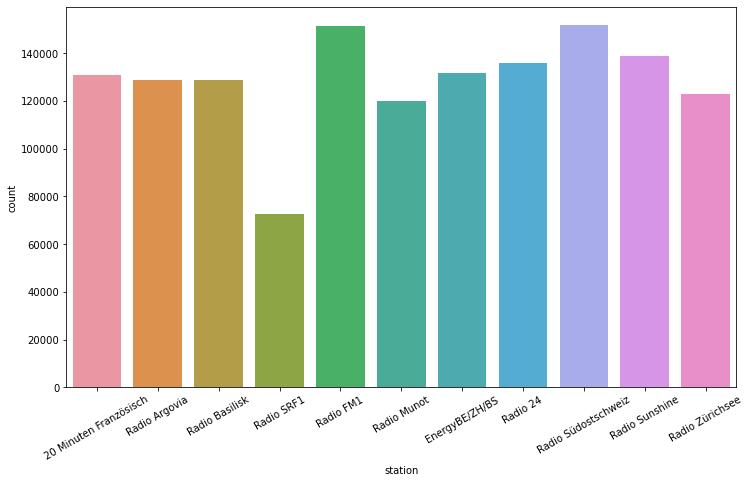

In [73]:
## descriptive analysis 
## plot station distribution 
plt.figure(figsize=(12,7))
ax= sns.countplot(x=frame["station"])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
# uncomment if you want to save png
#plt.savefig('station_dist.png', facecolor='w', bbox_inches='tight')
plt.show()

###  Analysis Questions 
1. Top most played songs for every station. How many times did they play it?

In [77]:
all_stations= ordered_songs_per_station["station"].unique()
top_songs_list= []

for item in all_stations:
    #print("Station: ", item)
    station_playlist=ordered_songs_per_station[ordered_songs_per_station["station"]==item]
    # index corresponding max value
    i = station_playlist['counts'].idxmax()
    # store the name corresponding this index
    df = station_playlist.loc[station_playlist.counts.idxmax()]
    top_songs_list.append(df)
    
top_songs_df = pd.DataFrame(top_songs_list)    

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

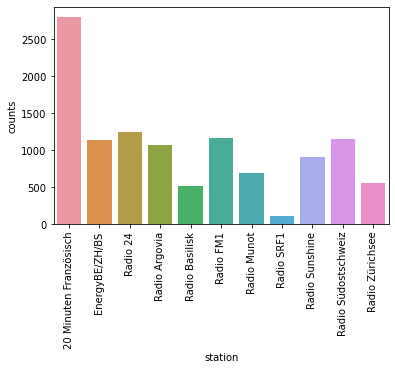

In [78]:
splot= sns.barplot(data=top_songs_df, x='station', y='counts')
plt.xticks(rotation=90)

In [79]:
top_songs_df

,station,artist,song,counts
435,20 Minuten Französisch,Vize & Tom Gregory,Never Let Me Down,2801
1588,EnergyBE/ZH/BS,Robin Schulz Feat. Kiddo,All We Got,1142
2033,Radio 24,Bastian Baker,Dancing Without You,1242
5506,Radio Argovia,Twocolors,Lovefool,1076
8431,Radio Basilisk,Purple Disco Machine & Sophie And The Giants,Hypnotized,514
10407,Radio FM1,Miley Cyrus,Midnight Sky,1164
12498,Radio Munot,Ofenbach Feat. Lagique,Wasted Love,688
20333,Radio SRF1,Paul Mccartney,Hope Of Deliverance,108
26564,Radio Sunshine,Purple Disco Machine & Sophie And The Giants,Hypnotized,905
30519,Radio Südostschweiz,The Weeknd,Save Your Tears,1153


2. Which songs does x station play, that other stations dont play

In [126]:
## change the names of the 2 stations you want to compare
primary="EnergyBE/ZH/BS"
second="Radio SRF1" 

### List of songs on first station but not second

In [127]:
df1= frame[frame["station"]==primary][["artist", "song"]]

df2=frame[frame["station"]==second][["artist", "song"]]


df_all = df1.merge(df2.drop_duplicates(), on=['artist','song'], 
                   how='left', indicator=True)

In [128]:
unique_first_station=df_all[df_all["_merge"]=="left_only"]
unique_first_station=unique_first_station.drop(columns="_merge")

In [129]:
unique_first_station.head()

,artist,song
2,Alicia Keys,Love Looks Better
3,Nico Santos,Safe
4,Alessia Cara,Scars To Your Beautiful
8,Melanie Fiona,Monday Morning
10,"Rudimental Feat. Jess Glynne, Macklemore & Dan...",These Days


### List of songs on second station but not first

In [130]:
df_all = df2.merge(df1.drop_duplicates(), on=['artist','song'], 
                   how='left', indicator=True)
unique_scnd_station=df_all[df_all["_merge"]=="left_only"]
unique_scnd_station=unique_scnd_station.drop(columns="_merge")

In [131]:
unique_scnd_station.head()

,artist,song
0,Bryan Adams,Summer Of '69
1,Israel Iz Kamakawiwo'Ole,Over The Rainbow
2,Julio Iglesias,Amor
3,Chica Torpedo,Uf De Feuge
4,Billy Swan,I Can Help


In [132]:
unique_frst= unique_first_station.shape[0]
unique_scnd= unique_scnd_station.shape[0]

print(f'Number of unique songs in first: {unique_frst}.')
print(f'Number of unique songs in second: {unique_scnd}.')

Number of unique songs in first: 72501.
Number of unique songs in second: 66854.


In [133]:
## to store in file unique first station
#filename_frst= f'IN {primary} NOT {second}'
#unique_first_station.to_csv(filename, index=False)

In [134]:
## to store in file unique second station
#filename_frst= f'IN {second} NOT {primary}'
#unique_scnd_station.to_csv(filename, index=False)

3. Is station's (nrj.csv) playlist coppied by other stations? (On how many songs do the stations overlap on?) 

In [135]:
nrj_stat= frame[frame["station"]=="EnergyBE/ZH/BS"][["artist", "song"]]
new_frame = frame.drop(nrj_stat.index)

In [136]:
all_stations= new_frame["station"].unique()
songs_list= []

for item in all_stations:
    df2=frame[frame["station"]==item][["artist", "song"]]
    df_all = df1.merge(df2.drop_duplicates(), on=['artist','song'], 
                   how='left', indicator=True)
    #what are the similar songs
    both_playlist= df_all[df_all["_merge"]=="both"][["artist", "song"]]
    #store playlist
    both_playlist.to_csv(f'copy/c_{item}')
    songs_list.append([item, both_playlist])
    


In [137]:
## all the common songs together 
songs_list

[['20 Minuten Französisch',
                                              artist  \
  1                       Younotus & Janieck & Senex   
  2                                      Alicia Keys   
  4                                     Alessia Cara   
  6                       Black Eyed Peas X J Balvin   
  7       Master Kg Feat. Burna Boy & Nomcebo Zikode   
  ...                                            ...   
  131911                           Atb X Topic X A7S   
  131917                 Meduza Feat. Dermot Kennedy   
  131918                                  Mando Diao   
  131923                         Jason Derulo X Nuka   
  131924                                  Ray Dalton   
  
                                   song  
  1                            Narcotic  
  2                   Love Looks Better  
  4             Scars To Your Beautiful  
  6           Ritmo (Bad Boys For Life)  
  7                  Jerusalema (Remix)  
  ...                               ...  
  1